In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import iplot
import plotly.express as px

In [20]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [21]:
path="/gdrive/MyDrive/covid-variants.csv"
df=pd.read_csv(path)


In [22]:
df.head(10)

,location,date,variant,num_sequences,perc_sequences,num_sequences_total
0,Angola,2020-07-06,Alpha,0,0.0,3
1,Angola,2020-07-06,B.1.1.277,0,0.0,3
2,Angola,2020-07-06,B.1.1.302,0,0.0,3
3,Angola,2020-07-06,B.1.1.519,0,0.0,3
4,Angola,2020-07-06,B.1.160,0,0.0,3
5,Angola,2020-07-06,B.1.177,0,0.0,3
6,Angola,2020-07-06,B.1.221,0,0.0,3
7,Angola,2020-07-06,B.1.258,0,0.0,3
8,Angola,2020-07-06,B.1.367,0,0.0,3
9,Angola,2020-07-06,B.1.620,0,0.0,3


In [23]:
df.tail(10)

,location,date,variant,num_sequences,perc_sequences,num_sequences_total
100406,Zimbabwe,2021-11-01,Gamma,0,0.0,6
100407,Zimbabwe,2021-11-01,Iota,0,0.0,6
100408,Zimbabwe,2021-11-01,Kappa,0,0.0,6
100409,Zimbabwe,2021-11-01,Lambda,0,0.0,6
100410,Zimbabwe,2021-11-01,Mu,0,0.0,6
100411,Zimbabwe,2021-11-01,Omicron,0,0.0,6
100412,Zimbabwe,2021-11-01,S:677H.Robin1,0,0.0,6
100413,Zimbabwe,2021-11-01,S:677P.Pelican,0,0.0,6
100414,Zimbabwe,2021-11-01,others,0,0.0,6
100415,Zimbabwe,2021-11-01,non_who,0,0.0,6


In [24]:
df.describe()

,num_sequences,perc_sequences,num_sequences_total
count,100416.000000,100416.000000,100416.000000
mean,72.171676,6.154355,1509.582457
std,1669.262169,21.898989,8445.291772
min,0.000000,-0.010000,1.000000
25%,0.000000,0.000000,12.000000
50%,0.000000,0.000000,59.000000
75%,0.000000,0.000000,394.000000
max,142280.000000,100.000000,146170.000000


In [25]:
df.columns

Index(['location', 'date', 'variant', 'num_sequences', 'perc_sequences',
       'num_sequences_total'],
      dtype='object')

In [29]:
df["variant"].unique()

array(['Alpha', 'B.1.1.277', 'B.1.1.302', 'B.1.1.519', 'B.1.160',
       'B.1.177', 'B.1.221', 'B.1.258', 'B.1.367', 'B.1.620', 'Beta',
       'Delta', 'Epsilon', 'Eta', 'Gamma', 'Iota', 'Kappa', 'Lambda',
       'Mu', 'Omicron', 'S:677H.Robin1', 'S:677P.Pelican', 'others',
       'non_who'], dtype=object)

In [30]:
df.shape

(100416, 6)

In [31]:
df.isnull().values.any()

False

In [33]:
df["variant"].value_counts()

variant
Alpha             4184
B.1.1.277         4184
others            4184
S:677P.Pelican    4184
S:677H.Robin1     4184
Omicron           4184
Mu                4184
Lambda            4184
Kappa             4184
Iota              4184
Gamma             4184
Eta               4184
Epsilon           4184
Delta             4184
Beta              4184
B.1.620           4184
B.1.367           4184
B.1.258           4184
B.1.221           4184
B.1.177           4184
B.1.160           4184
B.1.1.519         4184
B.1.1.302         4184
non_who           4184
Name: count, dtype: int64

<ipython-input-36-98461d3676bc>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-36-98461d3676bc>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-36-98461d3676bc>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-36-98461d3676bc>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-36-98461d3676bc>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be

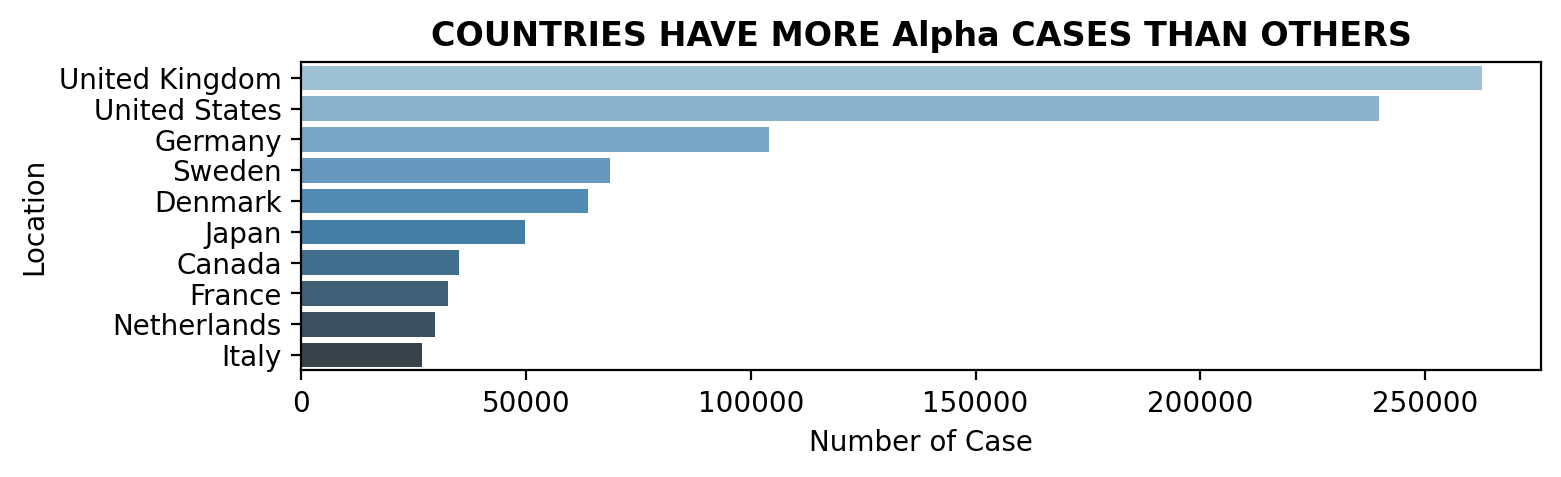

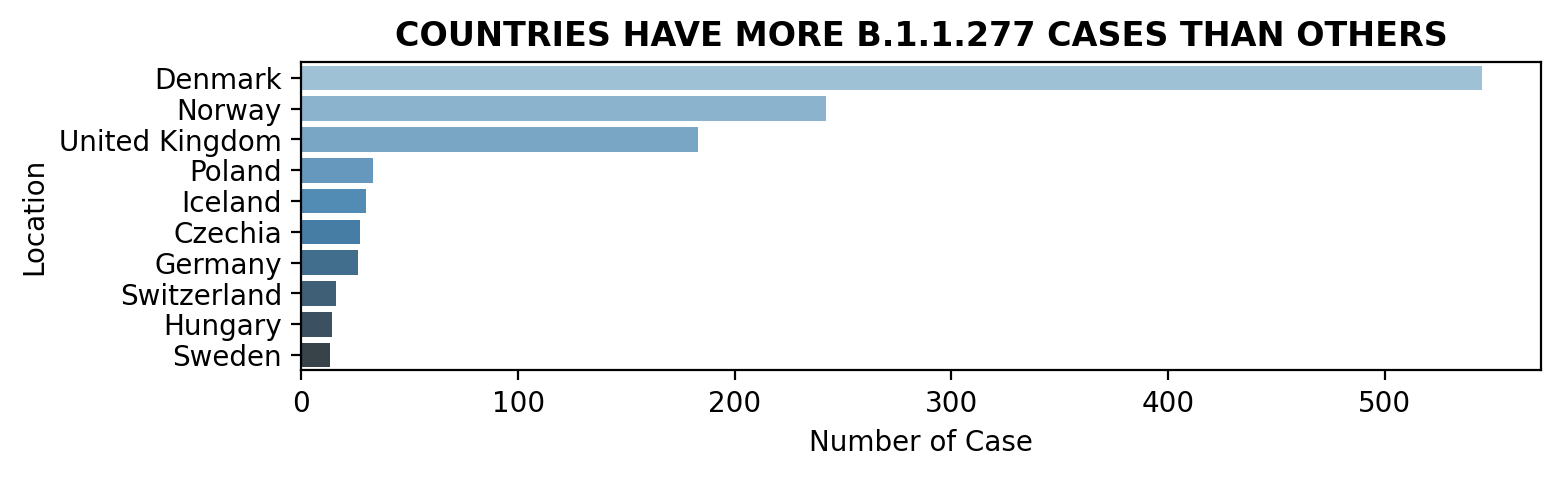

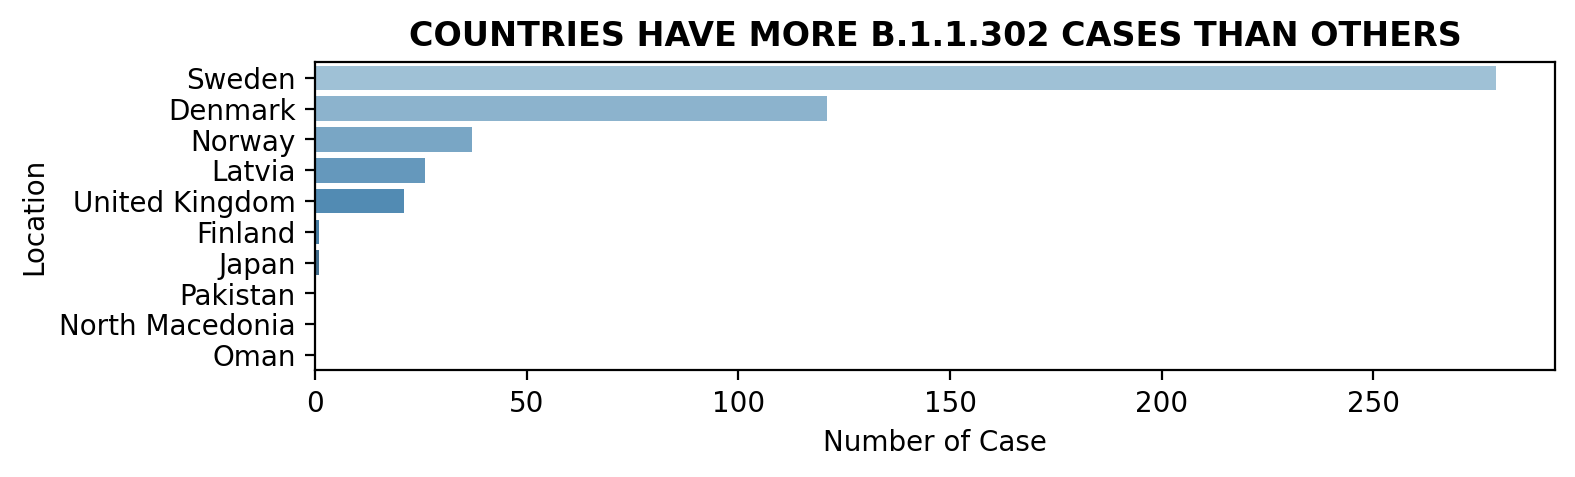

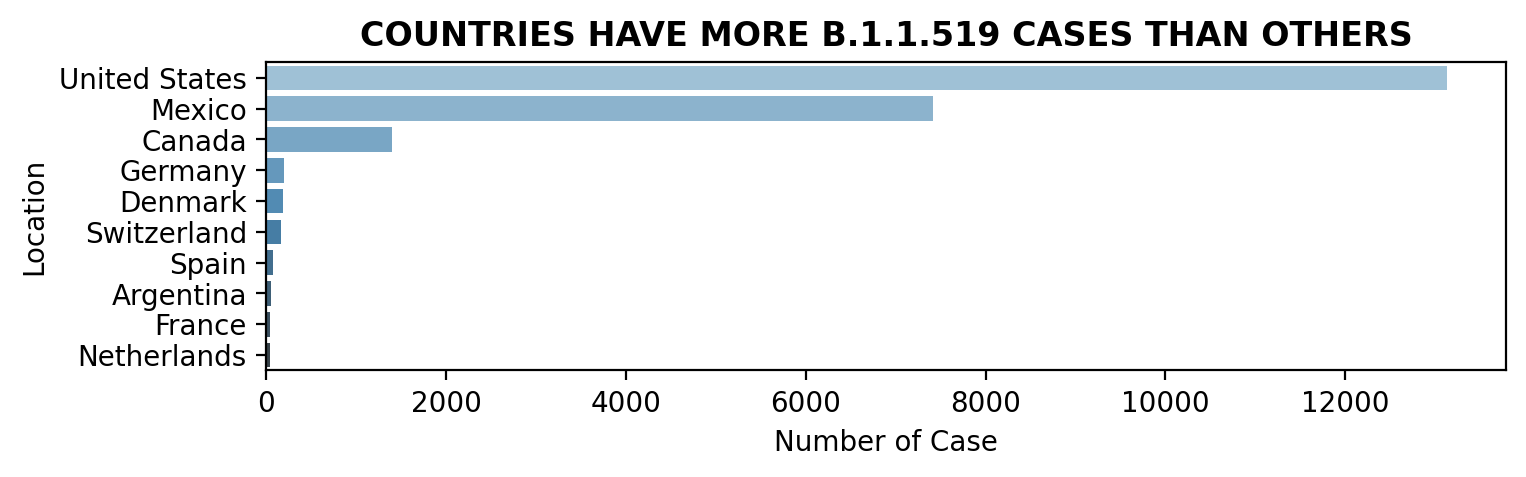

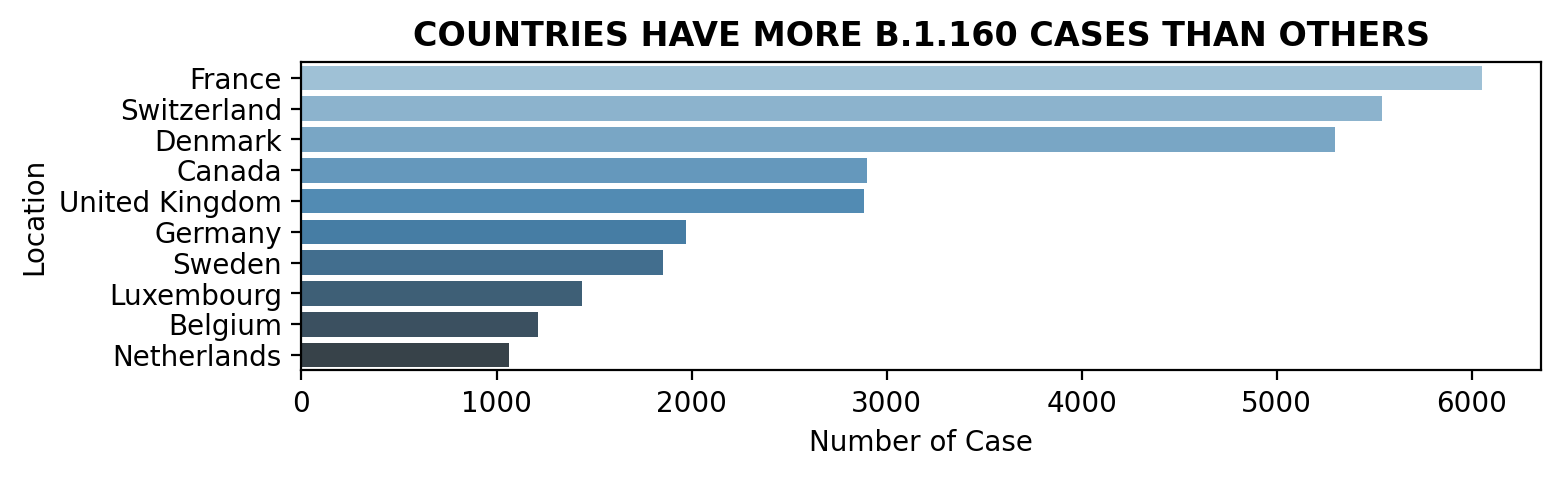

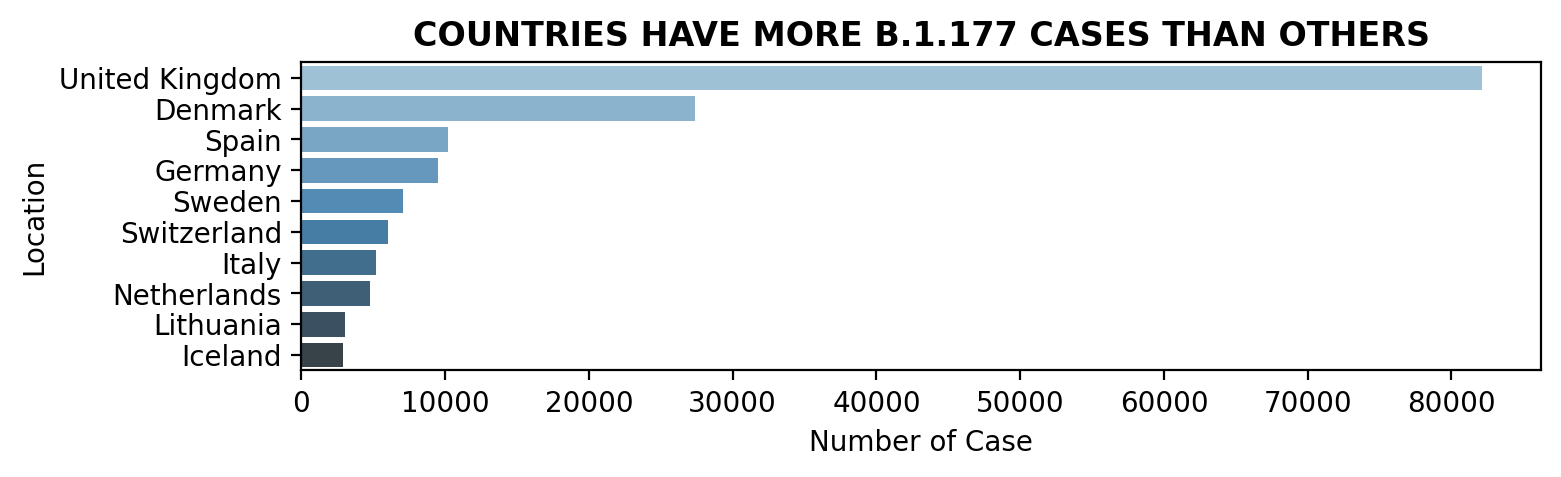

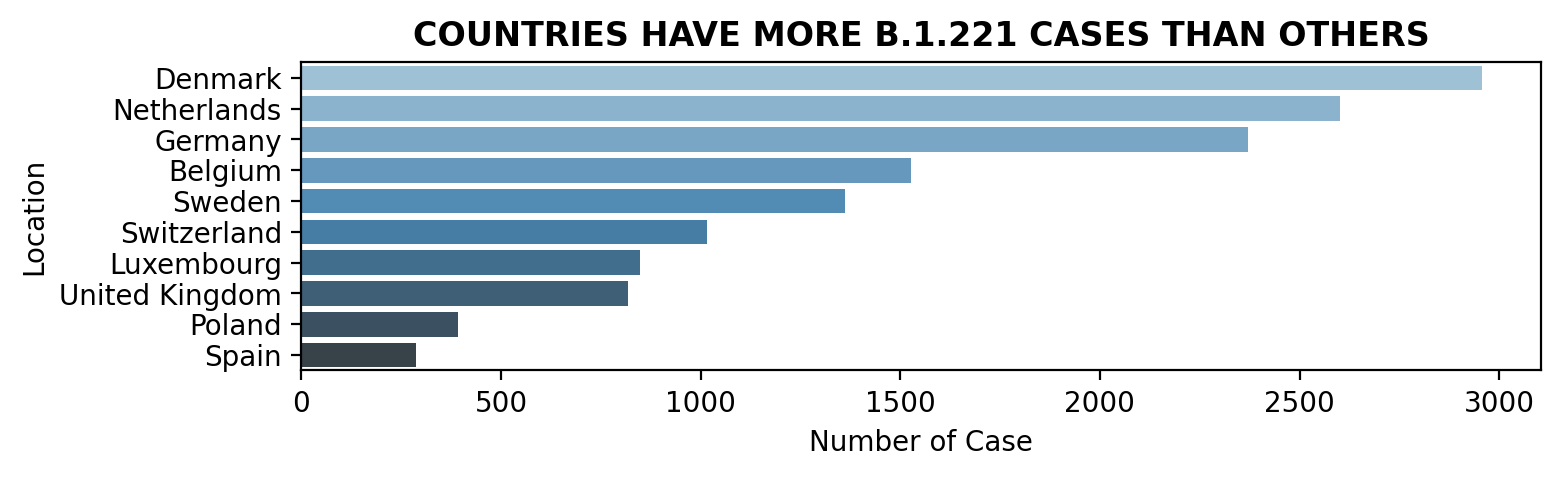

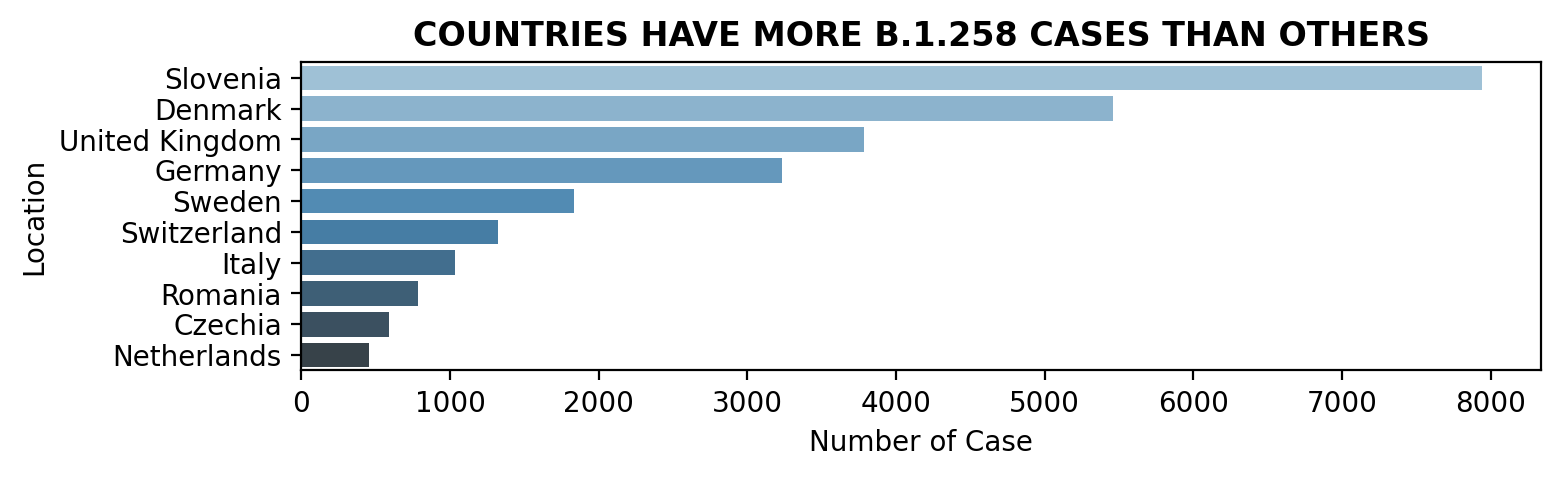

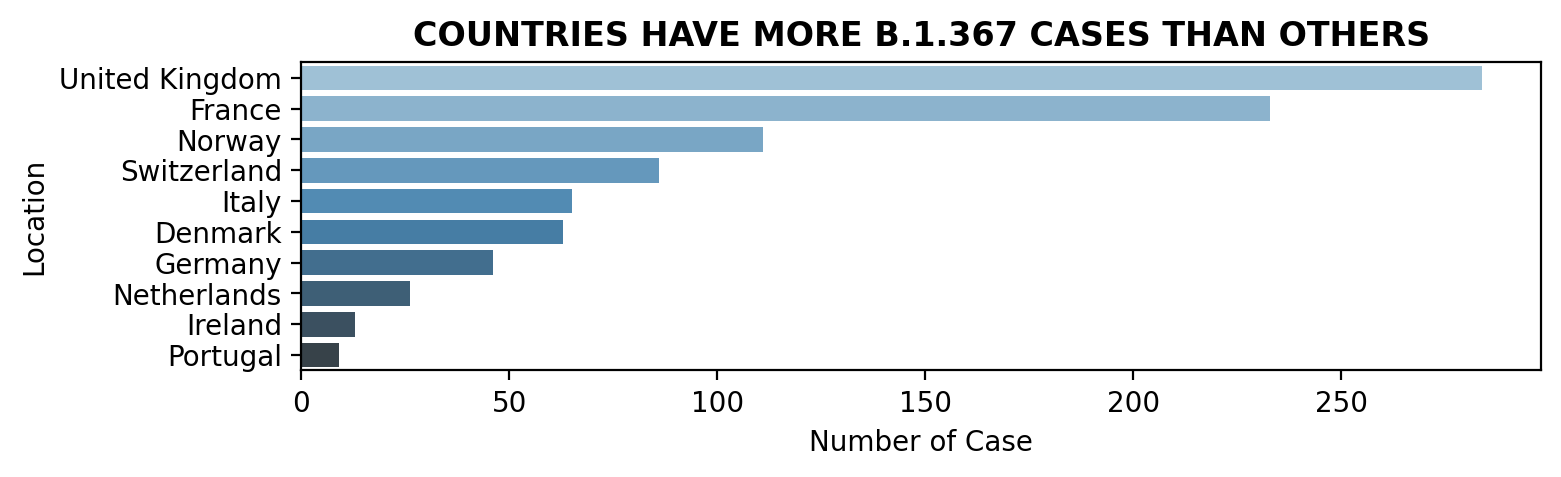

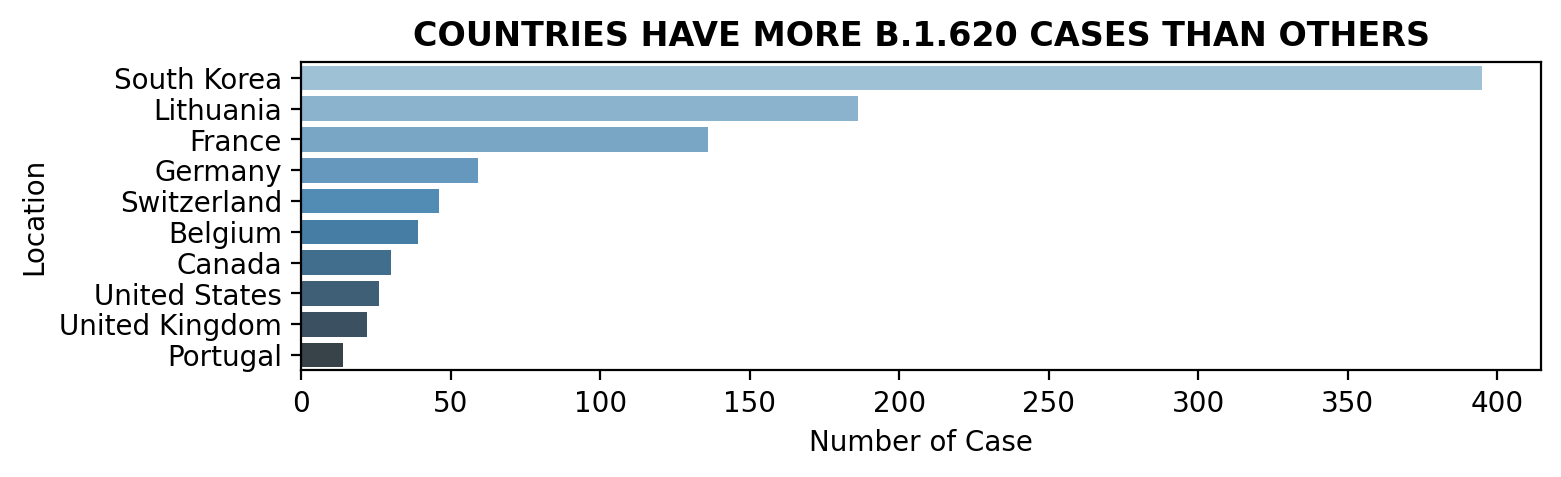

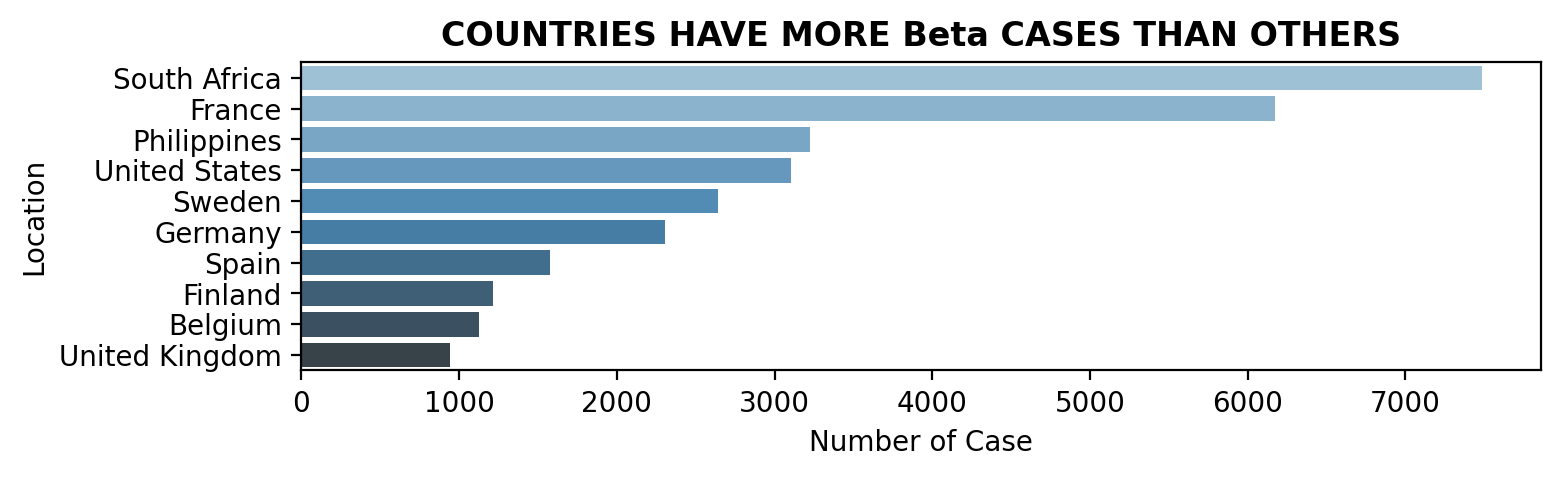

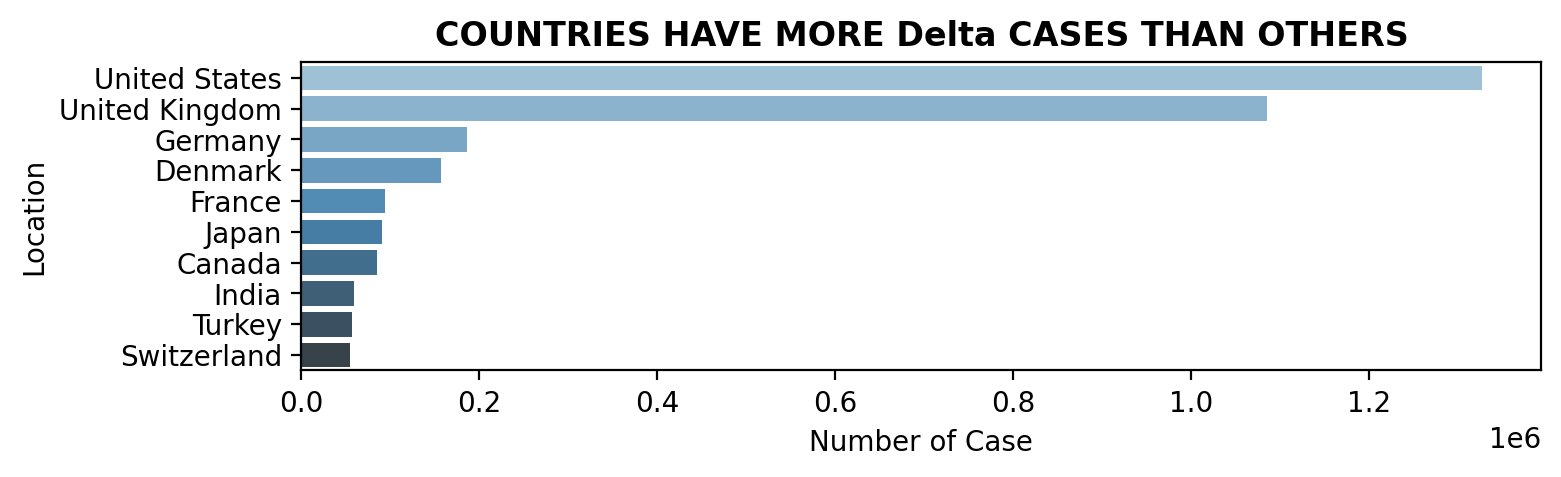

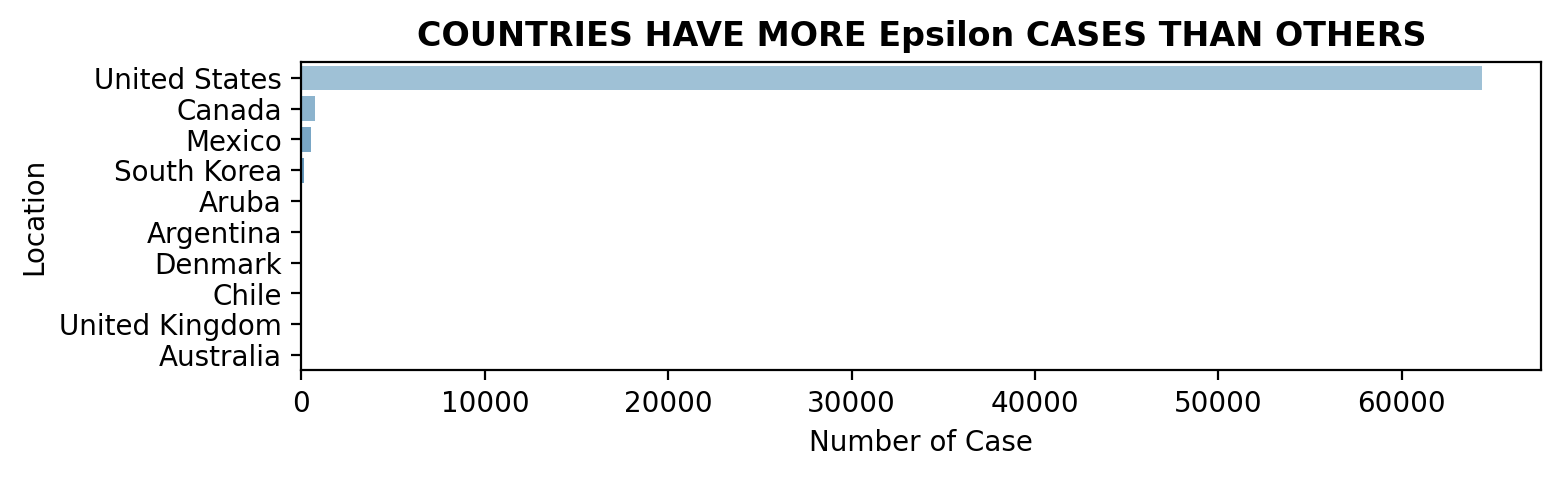

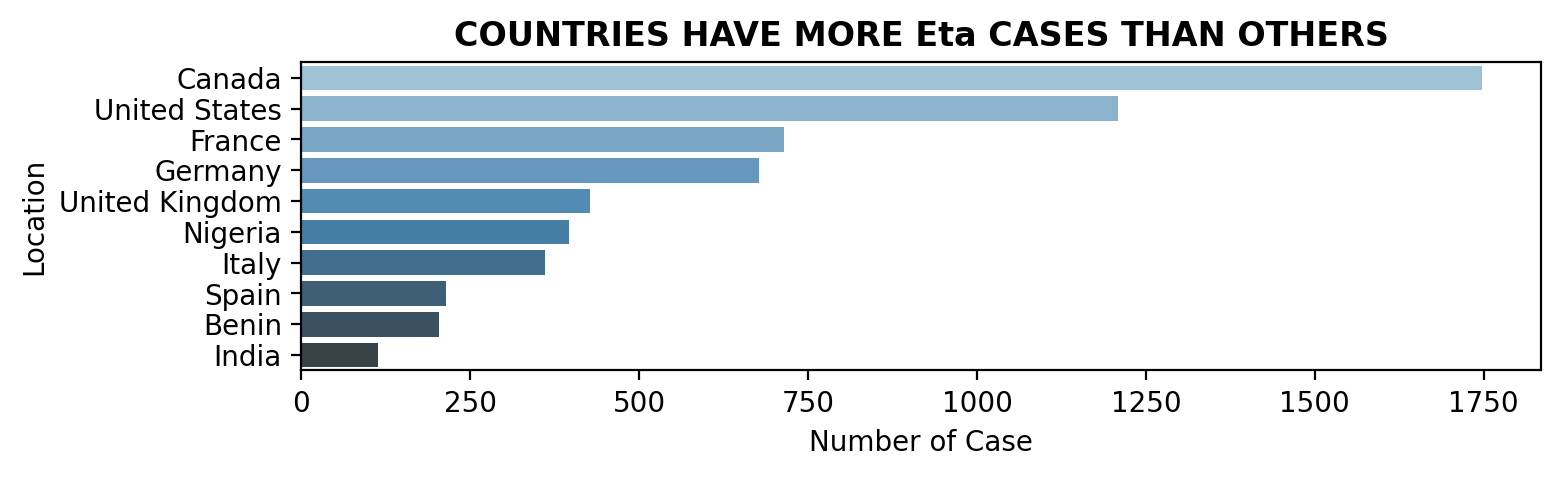

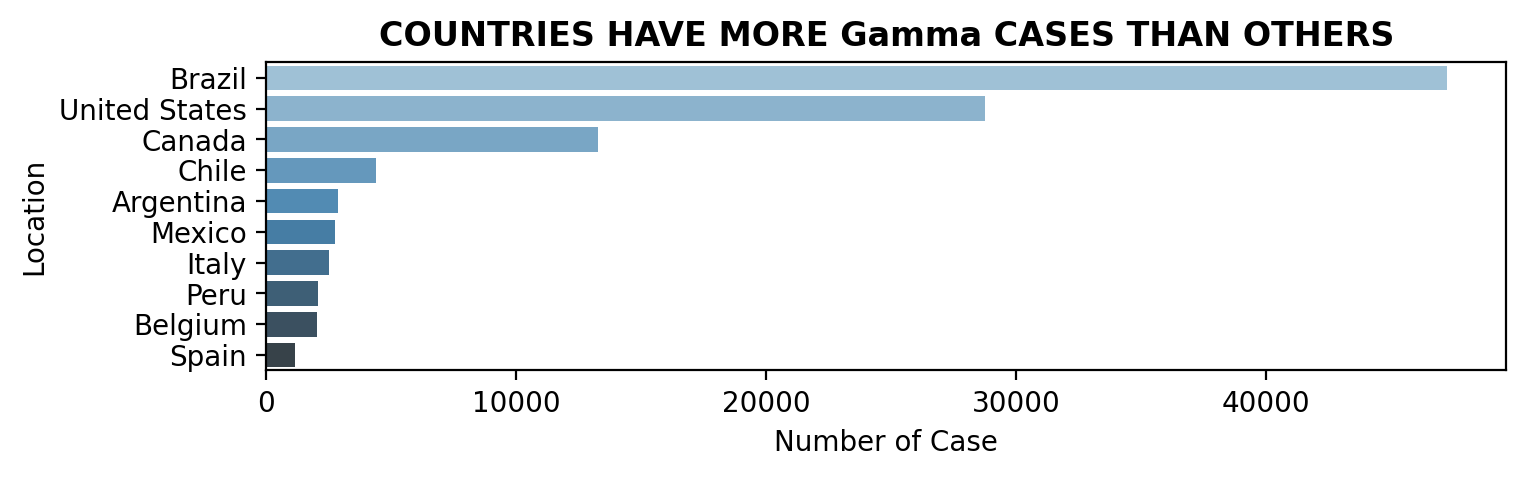

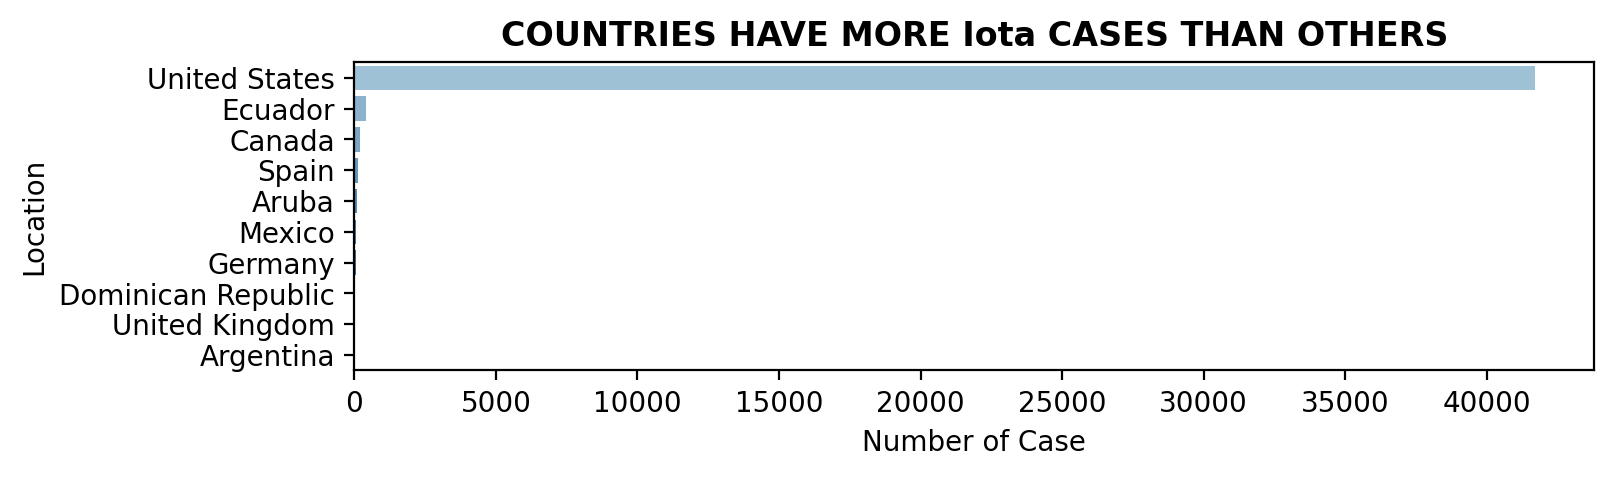

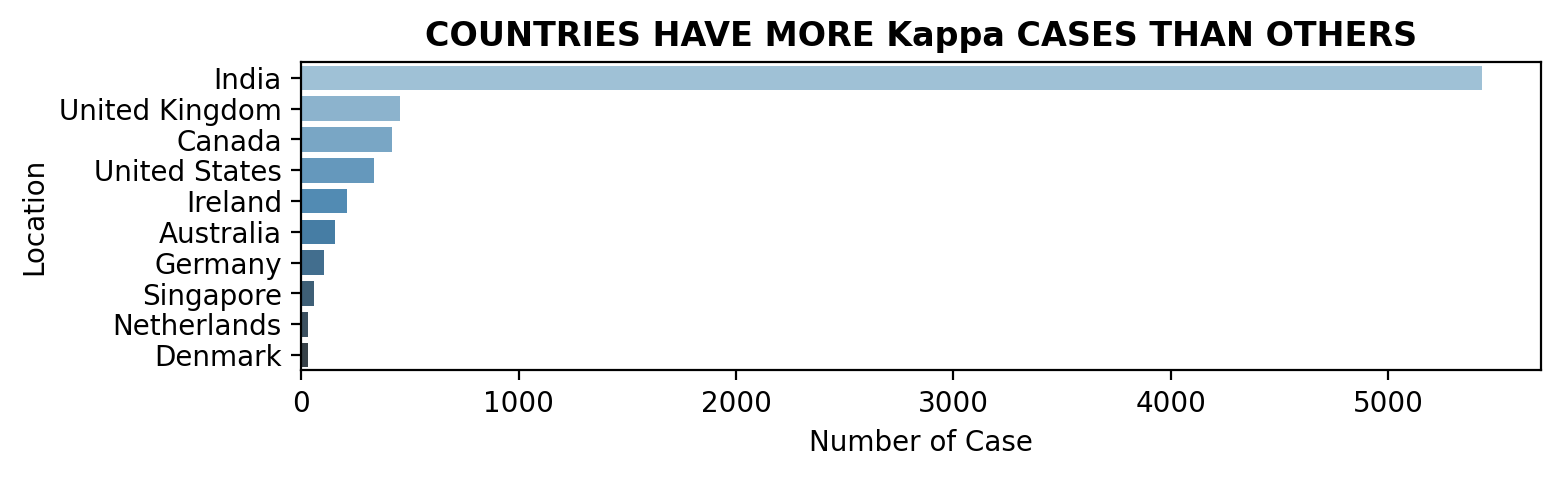

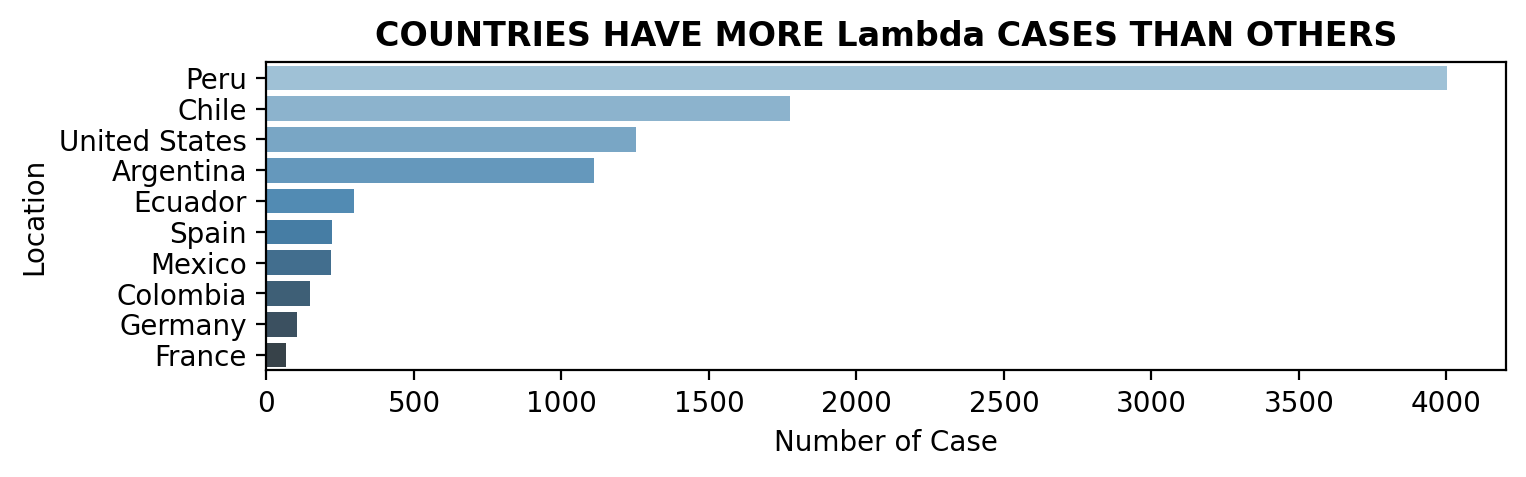

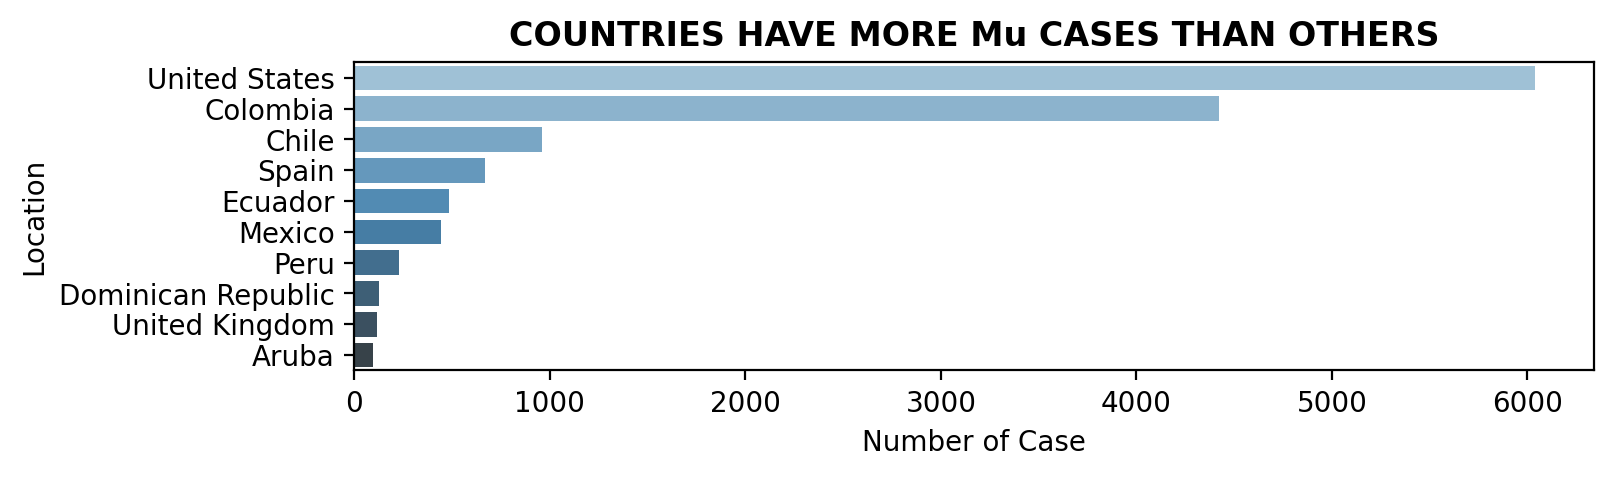

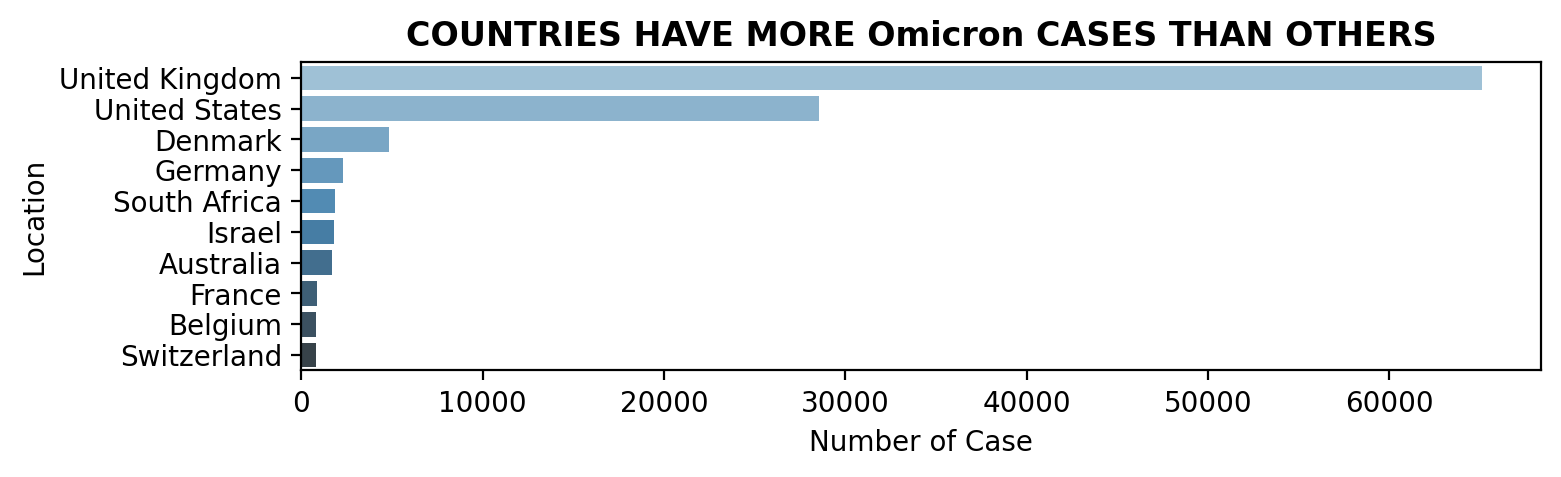

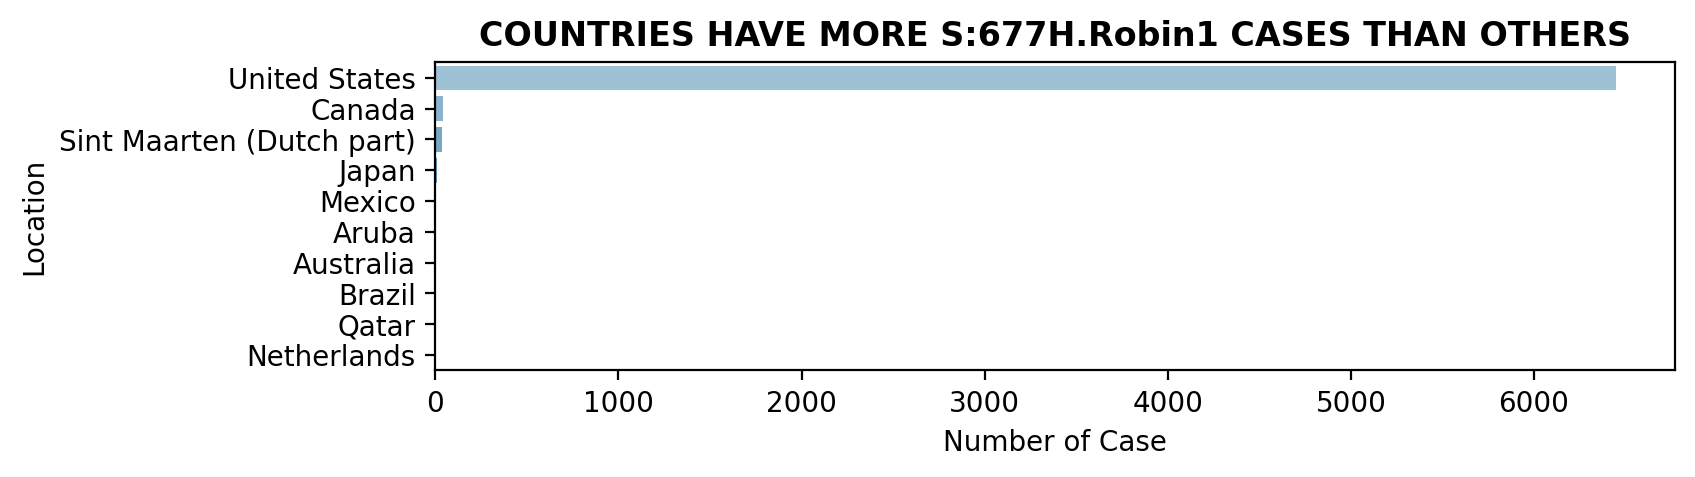

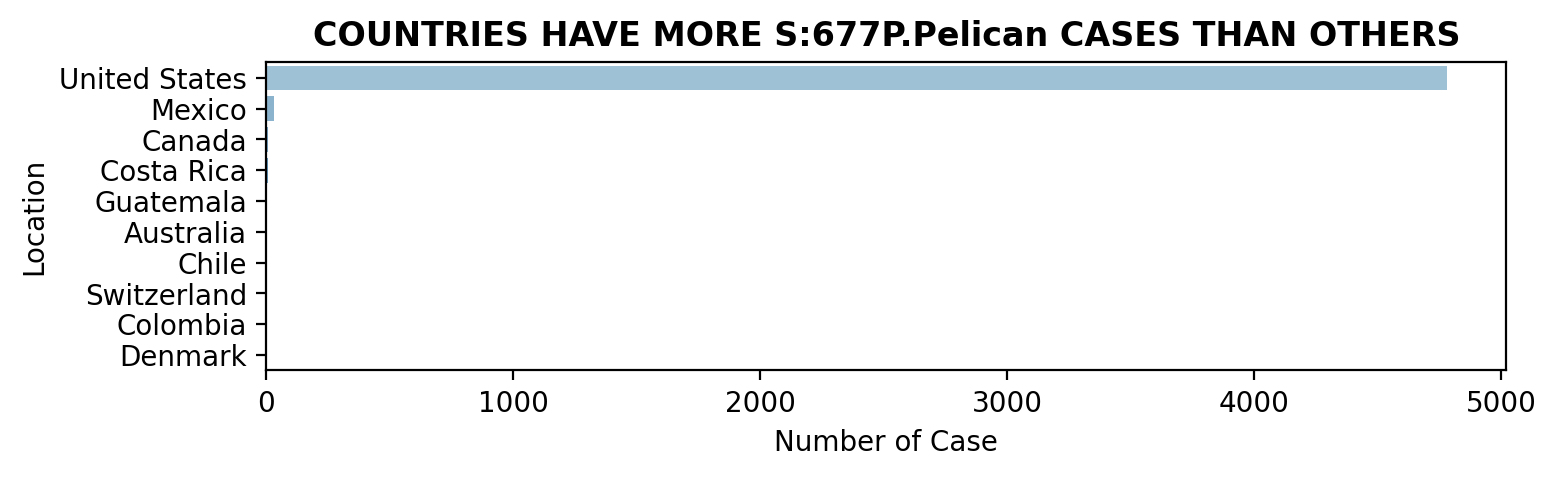

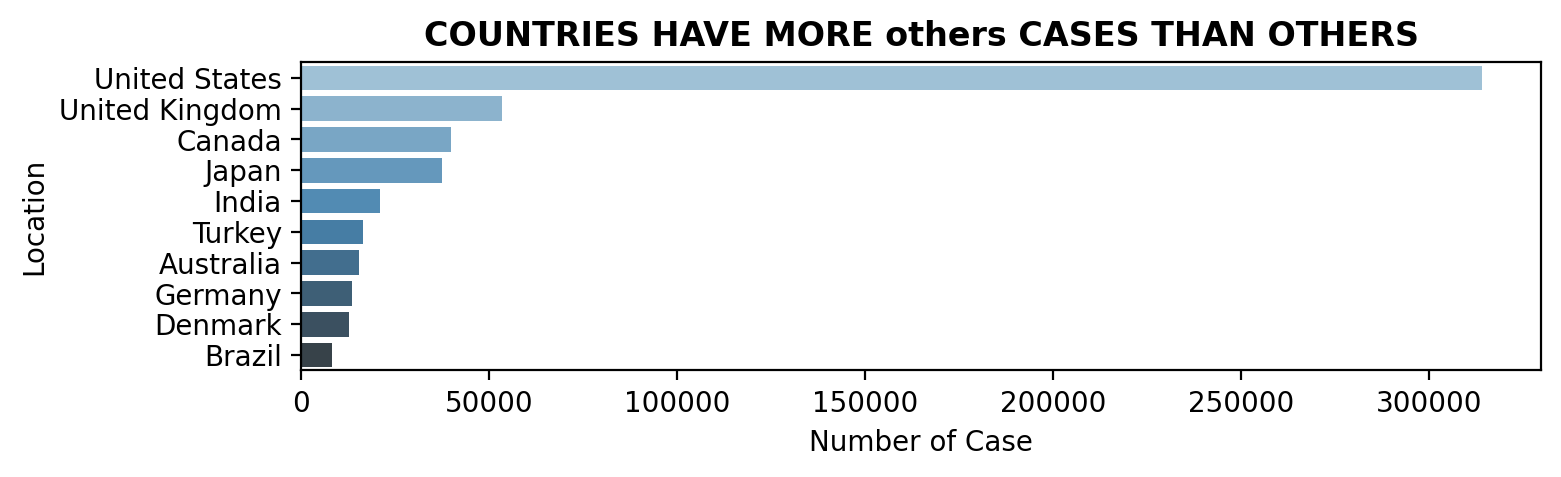

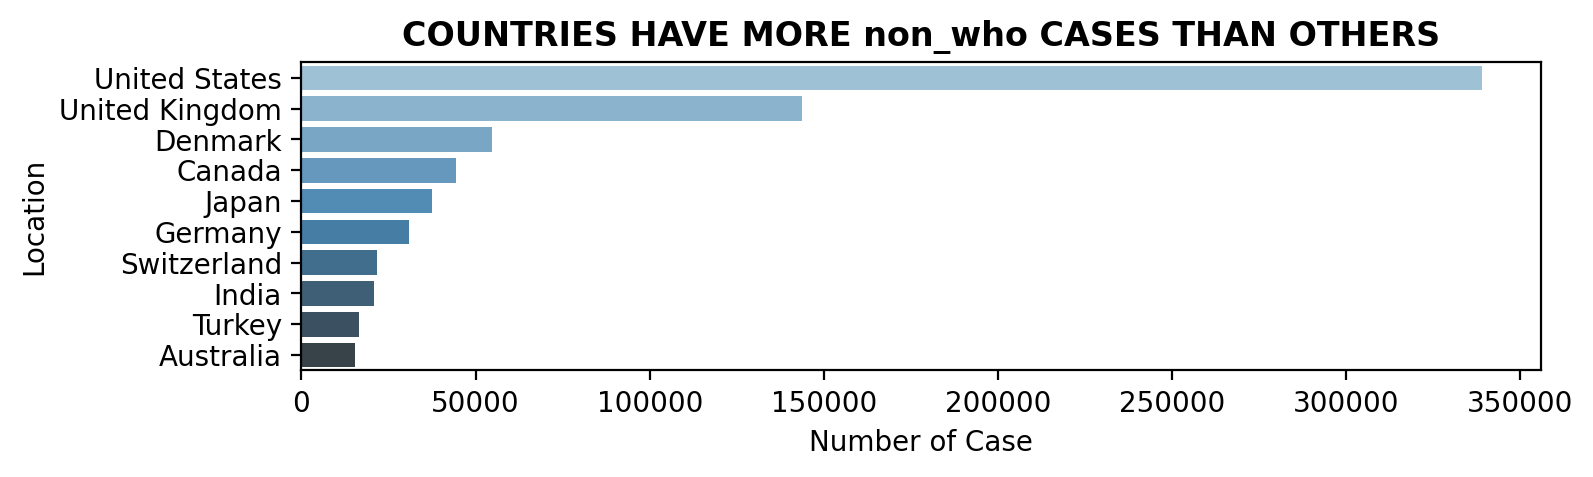

In [36]:
for virus in df.variant.unique():
    dataframe = df.loc[df['variant'] == virus].groupby('location')['num_sequences'].agg('sum').sort_values(ascending=False)[:10]
    dataframe = pd.DataFrame({'Location':dataframe.index, 'Number of Case':dataframe.values})
    plt.figure(figsize=(8,2),dpi=200)
    sns.barplot(y='Location',x="Number of Case",data=dataframe,palette="Blues_d")
    plt.title('COUNTRIES HAVE MORE {} CASES THAN OTHERS'.format(virus),loc='center',fontweight="bold")

Now we add a new column that will serve as an unique key for each row: this will be useful for filtering the data.

In [37]:
selection_zip=list(zip(df['location'],df['date']))
c=-1
old=""
selection_col=[]
for x in selection_zip:
    if (x!=old):
        old=x
        c+=1
    selection_col.append(c)
df["selection_col"]=selection_col

In [38]:
df.shape

(100416, 7)

In [39]:
df.describe()

,num_sequences,perc_sequences,num_sequences_total,selection_col
count,100416.000000,100416.000000,100416.000000,100416.000000
mean,72.171676,6.154355,1509.582457,2091.500000
std,1669.262169,21.898989,8445.291772,1207.822743
min,0.000000,-0.010000,1.000000,0.000000
25%,0.000000,0.000000,12.000000,1045.750000
50%,0.000000,0.000000,59.000000,2091.500000
75%,0.000000,0.000000,394.000000,3137.250000
max,142280.000000,100.000000,146170.000000,4183.000000


now we will try to obtain the filtered dataset for the variants omicron and delta, while the rest of the variants will be contained in a third dataset.

In [40]:
omicron=df[df["variant"]=="Omicron"]
delta=df[df["variant"]=="Delta"]
others=df[(df["variant"]!="Delta") & (df["variant"]!="Omicron")]

In [41]:
omicron_global=omicron.groupby("date").sum()
omicron_global["date"]=omicron_global.index
omicron_global=omicron_global[omicron_global["num_sequences"]>0]

delta_global=delta.groupby("date").sum()
delta_global["date"]=delta_global.index
delta_global=delta_global[delta_global["perc_sequences"]>0]

fig = go.Figure()
fig.add_trace(go.Scatter(x=omicron_global["date"],y=omicron_global["num_sequences"],mode='lines',line_width=5,name="Omicron num_sequences"))
fig.add_trace(go.Scatter(x=delta_global["date"],y=delta_global["num_sequences"],mode='lines',line_width=5,name="Delta num_sequences"))
fig.update_layout(title='Global log num_sequences for each date')
fig.show()

From the plot we can notice that:

1.The delta variant was being finded in the last days of October, then it began slowly to spread.

2.The omega variant was being finded one year later, then it began, faster than the delta variant, to spread.

At the end of the plot (end of 2021/ begin of 2022) it's possible to observe that for both variants we have very low num_sequences:

In [42]:
#How many samples have been sequenced every date globally?

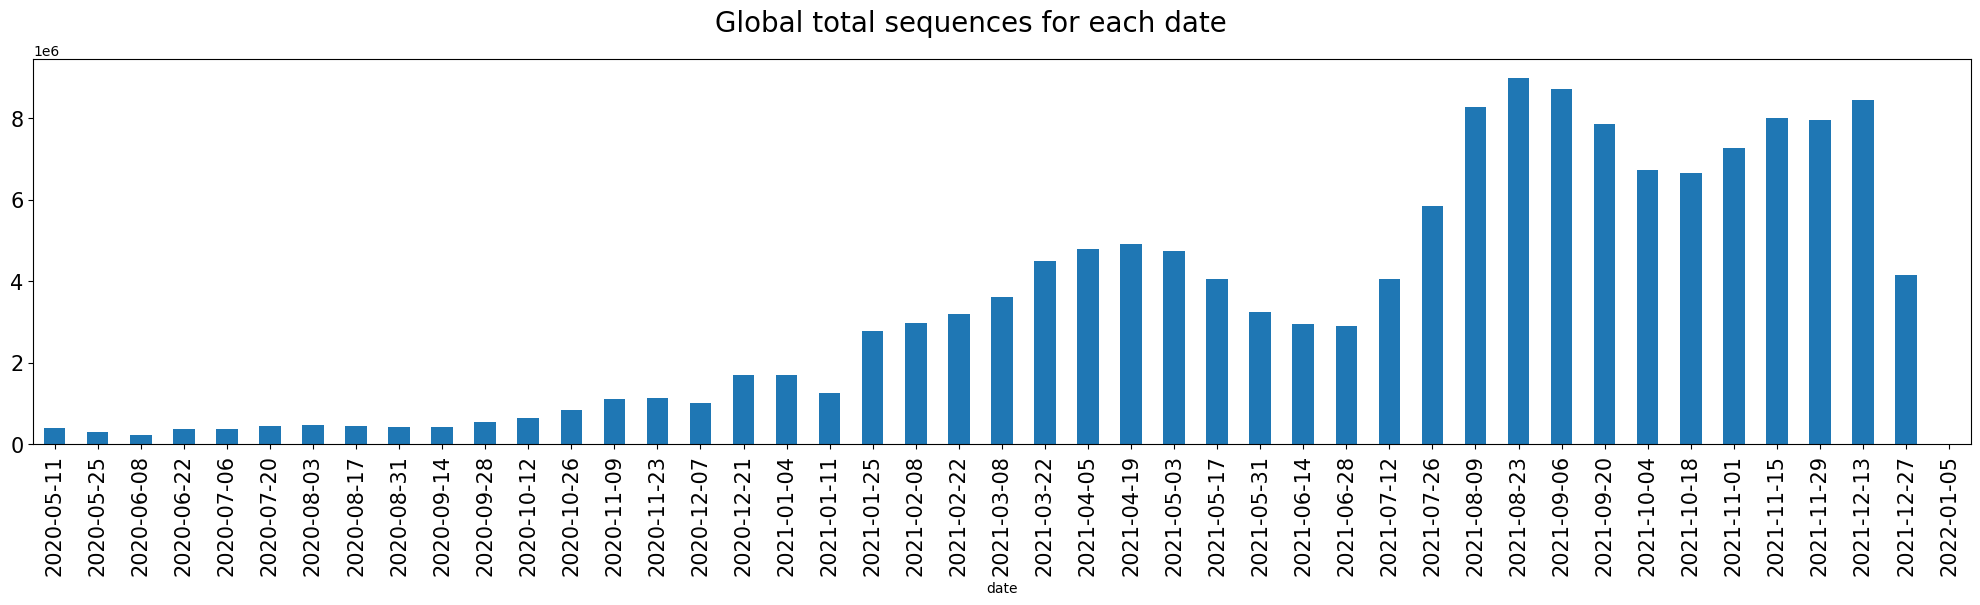

In [43]:
ax=df.groupby("date").sum().plot.bar(y="num_sequences_total",figsize=(25,5), fontsize=15,legend=False)
title=plt.suptitle("Global total sequences for each date",fontsize=20)

In [44]:
omicron_in=omicron[omicron["location"]=="India"]
omicron_in=omicron_in[omicron_in['perc_sequences']>0]

delta_in=delta[delta["location"]=="India"]
delta_in=delta_in[delta_in['perc_sequences']>0]


others_in=others[others['location']=='India'].groupby(['date']).sum()
comm=np.unique(np.hstack((delta_in['date'],omicron_in['date'])))
others_in=others_in[others_in.apply(lambda x: x.name in comm, axis=1)]
fig = go.Figure()
fig.add_trace(go.Scatter(x=omicron_in['date'],y=omicron_in["perc_sequences"],mode='lines',line_width=5,name="Omicron perc_sequences"))
fig.add_trace(go.Scatter(x=delta_in['date'],y=delta_in["perc_sequences"],mode='lines',line_width=5,name="Delta perc_sequences"))
fig.add_trace(go.Scatter(x=delta_in['date'],y=others_in["perc_sequences"],mode='lines',line_width=5,name="Other perc_sequences"))
fig.update_layout(title="India's perc_sequences of variants for each date")

In India the Oimcron variant is not spreaded yet but we can notice how is taking the place of the delta variant in the month of december.

In [46]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=omicron_in['date'],y=np.log1p(omicron_in["perc_sequences"]),mode='lines+markers'
                         ,line_width=5,marker_size=10,name="Omicron perc_sequences logarithm"))
fig.add_trace(go.Scatter(x=delta_in['date'],y=np.log1p(delta_in["perc_sequences"]),mode='lines+markers'
                         ,line_width=5,marker_size=10,name="Delta perc_sequences logarithm"))
fig.update_layout(title="India's perc_sequences logarithm of variants for each date")
fig.show()

In India the Omicron variant is not spreaded yet but we can notice how is taking the place of the delta variant in the month of december.